<a href="https://colab.research.google.com/github/Ghadighafara/UAS-Ghadi-Ghafara_3333210055/blob/main/UAS_ANDAT_3333210055_Ghadi_Ghafara_Kelas_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series**

A time-series is a series of data points indexed in time order and it is used to predict the future based on the previous observed values. Time series are very frequently plotted via line charts. Time series are used in statistics , weather forecasting, stock price prediction, pattern recognititon, earthquake prediction, e.t.c.

Time series analysis comprises methods for analysing time series data in order to extract meaningful statistics and other characteristics of the data.

Time series forecasting is the use of a model to predict future values based on previously observed values.

**Import Library**

mengimport data dari dataset yang digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

**Import Dataset**

masukkan link gdrive tempat disimpannya excel dataset yang digunakan untuk memasukkan data forecasting yang akan diolah

Dataset source : https://www.kaggle.com/datasets/ammaraahmad/tesla-stocks-history

In [3]:
# https://drive.google.com/file/d/1JiWsExSEDuWVJU269xjtZd8a_ukHsSD0/view?usp=sharing

!gdown 1JiWsExSEDuWVJU269xjtZd8a_ukHsSD0

Downloading...
From: https://drive.google.com/uc?id=1JiWsExSEDuWVJU269xjtZd8a_ukHsSD0
To: /content/TSLA.csv
100% 195k/195k [00:00<00:00, 106MB/s]


In [4]:
train_data = pd.read_csv('TSLA.csv')
train_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


**Check missing values**

mencari missing values pada codingan data. dan tidak terdapatnya missing values pada data dikarenakan terdapatnya nilai yang sama pada datanya

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2813 entries, 0 to 2812
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2813 non-null   object 
 1   Open       2813 non-null   float64
 2   High       2813 non-null   float64
 3   Low        2813 non-null   float64
 4   Close      2813 non-null   float64
 5   Adj Close  2813 non-null   float64
 6   Volume     2813 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 154.0+ KB


**Check statistic vales for every features**

mengecek statistik pada setiap fiturnya dari mulai *open, high, low, close, adj close *dan* volume*

In [6]:
train_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2813.000000,2813.000000,2813.000000,2813.000000,2813.000000,2.813000e+03
mean,98.307804,100.386953,96.069256,98.349877,98.349877,3.160441e+07
std,176.108180,179.847860,171.937613,176.160413,176.160413,2.857384e+07
min,3.228000,3.326000,2.996000,3.160000,3.160000,5.925000e+05
25%,8.838000,9.228000,8.782000,9.090000,9.090000,1.232800e+07
50%,45.720001,46.307999,44.908001,45.664001,45.664001,2.513300e+07
75%,63.998001,65.334000,63.014000,64.269997,64.269997,4.050650e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08


**Handle datetime data for time series**

menyatukan format *date* ke *date time* untuk mengubah format *date* mejadi *date time* dan menhgubah index menjadi seperti tahun-bulan-tanggal

In [7]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


**EXPLORATORY DATA ANALYSIS**

**visualize the Adjusted Close (Stock Price when market closed)**

menampilkan grafik pada data *Adj. Close*. dapat dilihat grafik menunjukkan kenaikkan yang cukup signifikan pada tahun 2022, namun setelahnya terjadi fluktuasi yang tidak terlalu signifikan


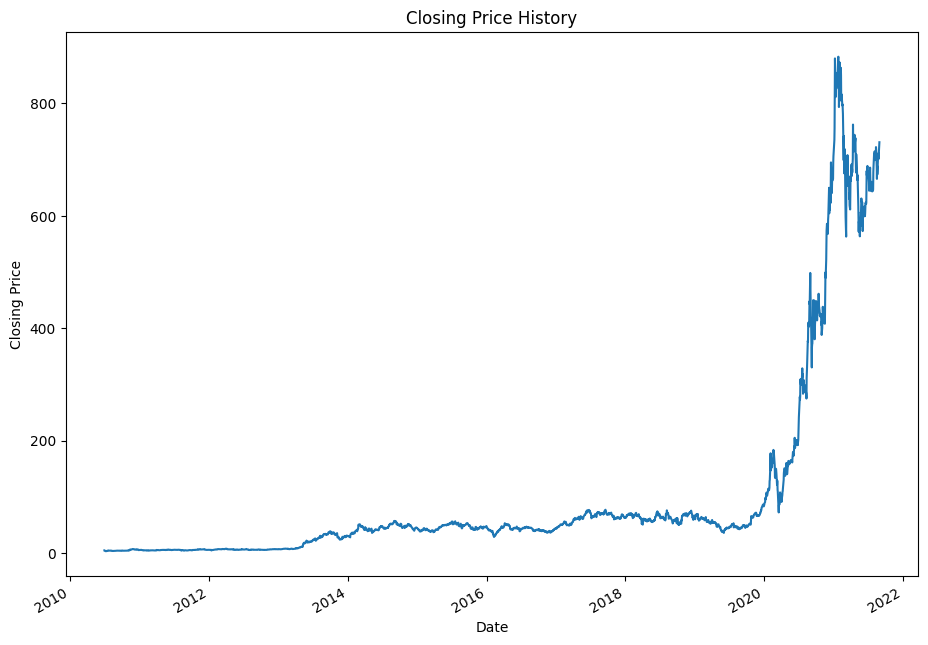

In [11]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

**Visualize every data Fiture**

membuat grafik pada setiap fitur untuk melihat perkembangan pada setiap fiturnya. dapat dilihat pada setiap fitur mengalami kenaikan secara menyeluruh, namun pada fitur volume terjadinya fluktuasi yang beragam

<Figure size 1600x800 with 0 Axes>

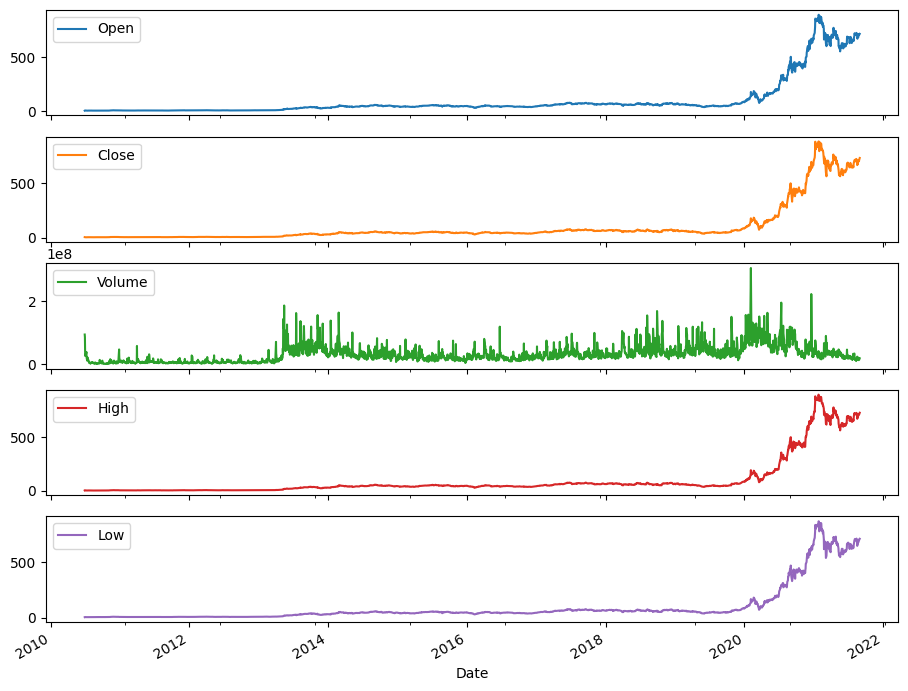

In [12]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

In [13]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0

In [14]:
df = train_data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']]

In [15]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)

141


<ipython-input-15-8a15e8de9d0b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Adj Close'].shift(-forecast_out)


In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

It’s clear from the plot that there is an overall increase in the trend,with some seasonality in it.

In [17]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-17-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


In [18]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

In [19]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-19-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

In [22]:
lr_confidence

0.757202578058223

In [23]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

In [24]:
rf_confidence

0.9526056989370302

In [25]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-25-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-25-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-25-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

**Visualize the data forecast**

dapat dilihat pada grafik untuk garis berwarna jingga menunjukkan forecast yang telah dilakukan. untuk hasil forecast pada grafik dapat disimpulkan bahwa peramalan berada pada kisaran *price* 600-800

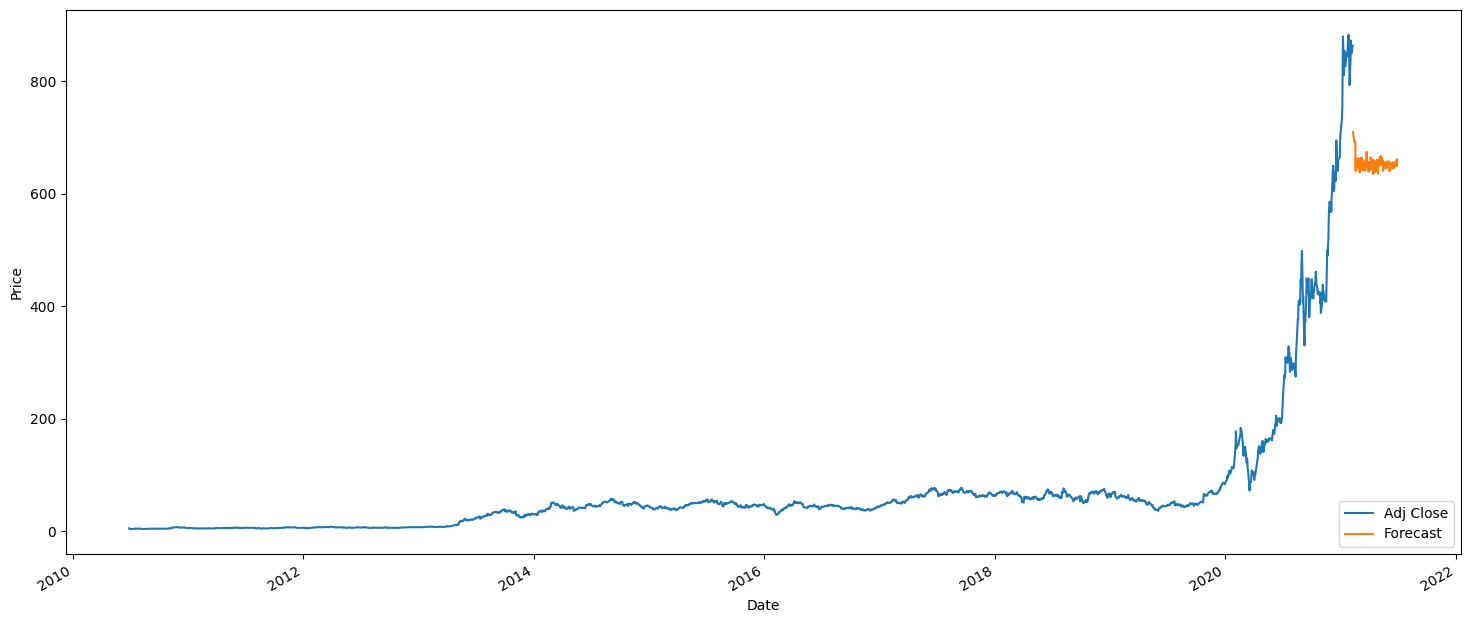

In [26]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()